# Probability and statistics tools and demonstrations
By <a href="https://www.maxkapur.com/">Max Kapur</a>. Updated Nov. 26, 2019.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom
from math import factorial

## A detailed look at independent and dependent probability
Reference: Robert V. Hogg et al., *Probability and Statistical Inference* 9e, section 1.4.

A homework problem from this section reads,

> An urn contains 10 red and 10 white balls. The balls are drawn from the urn at random, one at a time. Find the probabilities that the fourth white ball is the fourth, fifth, sixth, or seventh ball drawn if the sampling is done
>
> <ol style="list-style-type: upper-alpha;"><li>With replacement.</li><li>Without replacement.</li><li>In the World Series, the American League (red) and National League (white) teams play until one team wins four games. Do you think that the urn model presented in this exercise could be used to describe the probabilities of a 4-, 5-, 6-, or 7-game series? (Note that either &ldquo;red&rdquo; or &ldquo;white&rdquo; could win.) If your answer is yes, would you choose sampling with or without replacement in your model? (For your information, the numbers of 4-, 5-, 6-, and 7-game series, up to and including 2012, were 21, 24, 23, 36. This ignores games that ended in a tie, which occurred in 1907, 1912, and 1922. Also, it does not include the 1903 and 1919&ndash;1921 series, in which the winner had to take five out of nine games. The World Series was canceled in 1994.)</li></ol>

I will use Python to demonstrate how list comprehensions can cut down on the busy work otherwise required by this problem. (Take a look at the ratio of text to code in this section!)

First, let&rsquo;s think about what it means for the fourth white ball to occur on the *n*th trial.

There is only one way for the fourth white ball to occur on the fourth trial: all of the preceding balls must have also been white. For a reason that will be clear in a moment, we can express this one possible arrangement as the binomial coefficient $1 = \binom{3}{3}$.

For the fourth white ball to occur on the fifth trial, there must have been exactly three white balls on trials one through four (any more, and the experiment has terminated; any fewer, and we&rsquo;ll need to run more trials). There are $\binom{4}{3} = 4$ ways for that to happen:

$$\text{white, white, white, red}\\ \text{white, white, red, white} \\\text{white, red, white, white} \\\text{red, white, white, white}$$

Likewise, if we draw the fourth white ball on trial six, there are $\binom{5}{3}$ ways for there to have been exactly three white balls drawn in the preceding five trials.

The number of &ldquo;ways&rdquo; for the fourth white ball to occur on the *n*th trial is then $\binom{n-1}{3}$. Let&rsquo;s store those values for $n = \{4,5,6,7\}$ in the variable <code>ways</code>. We need these coefficients to answer both parts of the question.

In [2]:
ways = np.array([binom(n-1,3) for n in range(4,8)])
ways

array([ 1.,  4., 10., 20.])

#### Part A

For the fourth white ball to occur on a certain trial, we need to stick exactly to the sequences enumerated above, then complete each sequence by drawing a white ball on the *n*th trial itself. In part A, we are sampling with replacement, so the probability of selecting a given ball on a given trial is always $10/20 = 1/2$. That means that each sequence of length *n* occurs with probability $P(S_n) = (1/2)^n$. Let&rsquo;s store these probabilities in another vector, <code>psn</code>.

Note that $S_n$ denotes the probability of *a given particular* sequence of length *n* occurring, not the (higher) probability of &ldquo;any sequence containing four white outcomes, with the white outcome coming up last.&rdquo;

In [3]:
psn = np.array([0.5**n for n in range(4,8)])
psn

array([0.0625   , 0.03125  , 0.015625 , 0.0078125])

Now, let $A_n$ denote the event of drawing the fourth ball on the *n*th trial, or using the language above, &ldquo;any sequence containing four white outcomes, with the white outcome coming up last.&rdquo; Well, we already figured out the number of length-*n* sequences that fit this description when we created the <code>ways</code> variable. Multiplying those coefficients by the corresponding terms of <code>psn</code> will give us the answer to part A.

In [4]:
ways * psn

array([0.0625 , 0.125  , 0.15625, 0.15625])

This is $\frac{1}{16}, \frac{1}{8}, \frac{5}{32}, \frac{5}{32}$, the answer given in the book. 

However, another way to interpret the question would be to find the probability of the fourth white ball occurring on *any one* of the four trials mentioned. This is $P(A_4 \cup A_5 \cup A_6 \cup A_7 )$. Since the $A_n$ are mutually exclusive (you cannot draw the fourth white ball on trial four and then again on trial five), we know:

$$\begin{align} P(A_4 \cup A_5 \cup A_6 \cup A_7 ) &= P(A_4) + P(A_5) + P(A_6) + P(A_7) \\ &= \binom{3}{3}\left(\frac{1}{2}\right)^4 + \binom{4}{3}\left(\frac{1}{2}\right)^5 + \binom{5}{3}\left(\frac{1}{2}\right)^6 + \binom{6}{3}\left(\frac{1}{2}\right)^7 \\ & = \frac{1}{2} \end{align} $$

This is just the dot product of our <code>ways</code> and <code>psn</code> variables.

In [5]:
ways @ psn

0.5

Doubling this number yields that odds that four white balls *or* four red balls will occur within seven trials, proving that the World Series never needs to run beyond seven games (disregarding ties).

#### Part B
This is a little trickier. We should start by noticing that the combinations that will yield terminating sequences are exactly the same. That is, we can reuse our <code>ways</code> variable, and what we need to find now is $T_n$, the probability of a given length-*n* sequence containing four white balls and $n-4$ red balls. 

In the $n=4$ case, there is only one possible such sequence: $\text{white, white, white, white}$. Since we lose one white ball from the urn each time we draw one, we get a factorialish expression: 

$$ P(T_4) = \frac{10}{20} \cdot \frac{9}{19} \cdot \frac{8}{18} \cdot \frac{7}{17} $$

For a longer sequence, the denominator will look similar: it will have the first *n* terms of $20!$. The numerator requires a bit of attention. $10 \cdot 9 \cdot 8 \cdot 7$ will stay there, but instead of continuing to decrease, the red balls in the sequence deplete their seperate supply of ten. So, for example, 

$$P(T_6) = \left( \frac{10}{20} \cdot \frac{9}{19} \cdot \frac{8}{18} \cdot \frac{7}{17} \right) \cdot \left( \frac{10}{16} \cdot \frac{9}{15} \right) $$

This corresponds to the sequence $\text{white, white, white, white, red, red}$. Technically, this sequence would have terminated at the fourth trial, but rearranging the sequence of draws only rearranges the numerator of this calculation, leaving the value of $T_6$ unchanged. Thinking hard about factorials reveals an expression for $T_n$:

$$P(T_n) = \frac{(20 - n)!}{20!} \cdot \frac{10!}{6!} \cdot  \frac{10!}{(14-n)!}$$

Let&rsquo;s put $P(T_n)$ for $n = \{4,5,6,7\}$ into the variable <code>ptn</code>.

In [7]:
d = factorial(10)*factorial(10) / (factorial(20) * factorial(6))
ptn = np.array([d * factorial(20-n) / factorial(14-n) for n in range(4,8)])
ptn

array([0.04334365, 0.02708978, 0.01625387, 0.00928793])

Just as above, we can answer part B with term-by-term product of <code>ways</code> and <code>ptn</code>.

In [8]:
ways * ptn

array([0.04334365, 0.10835913, 0.1625387 , 0.18575851])

The textbook gives $\frac{14}{323}, \frac{35}{323}, \frac{105}{646}, \frac{60}{323}$, which is the same.

We might also choose to give the sum of these probabilities, or the probability that the fourth white ball occurs before the eighth trial. If we did things right, this should also be 0.5, because of the aforementioned symmetry between the white and red versions of this problem.

In [12]:
ways @ ptn

0.5

#### Part C

Before answering the question as posed, let&rsquo;s consider the two models we&rsquo;ve created. In part A, we replaced the balls after pulling them, meaning that each trial was independent. In part B, the probability of pulling a white or red ball depends on how many balls have been taken out so far. If we&rsquo;ve already removed three white balls, then the urn contains only seven white balls and ten red ones; a red one is more likely on our next pull.

The self-correcting nature of the dependent version of this problem is evident in the graph below. Since red balls become more likely when white is &ldquo;in the lead&rdquo;, the likelihood of it taking seven trials to get four red balls is higher. Notice how the purple bars increase steadily in height, while the green ones reach a plateau.

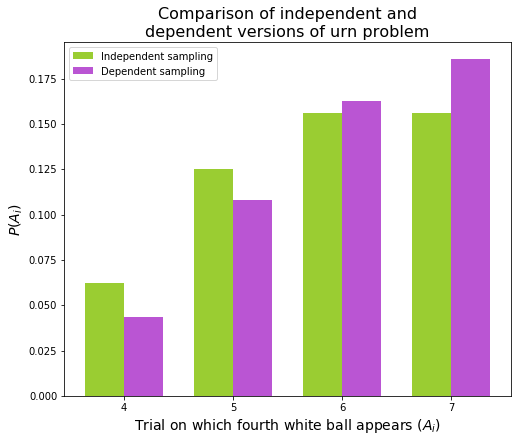

In [44]:
x=np.arange(4,8)
width=0.36
x1 = x - width/2
x2 = x + width/2


plt.figure(figsize=(8,6.5))
plt.bar(x=x1,height=ways*psn,width=width,color='yellowgreen',label='Independent sampling')
plt.bar(x=x2,height=ways*ptn,width=width,color='mediumorchid',label='Dependent sampling')

plt.xlabel(r'Trial on which fourth white ball appears ($A_i$)',size=14)
plt.ylabel(r'$P(A_i)$',size=14)
plt.title('Comparison of independent and\ndependent versions of urn problem',size=16)
plt.xticks(x)
plt.legend()

My intuition says that the independent model should be a decent reflection of what happens in the World Series. While the relative skill of the teams may be different (white probably doesn&rsquo;t have an exactly fifty percent chance of winning), it doesn&rsquo;t seem to me that each team is drawing on a finite supply of wins or that their performance will deteriorate the more games they win.

On the other hand, perhaps there is an underdog phenomenon in which teams that are falling behind tend to exert themselves in hopes of a comeback victory. 

On a third hand, perhaps losing teams tend to lose hope and give up after a few early losses.

If either of the previous two assertions are true, then we must discard the independent model. However, there are all sorts of dependent models possible, and the one we created above may be even worse than the independent model. In the end, neither model is suited to the real data that the textbook provides. Let&rsquo;s add that to our graph, and this time we will double the probabilities obtained in the urn problem to account for the fact that four wins by *either* team ends the World Series:

In [35]:
ws = np.array([21, 24, 23, 36])
# Divide by the sum to get the experimental probability
ws = ws / ws.sum()

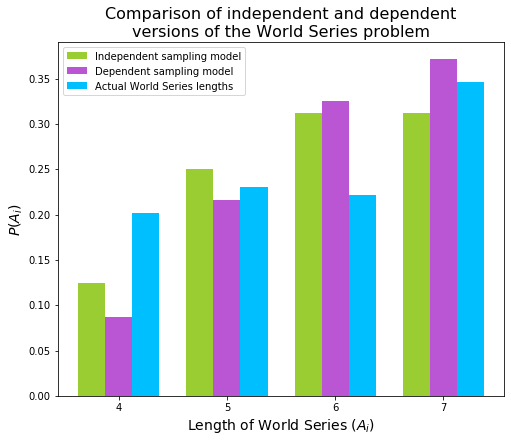

In [47]:
x=np.arange(4,8)
width=0.25
x1 = x - width
x2 = x + width

plt.figure(figsize=(8,6.5))
# Double the models since now we allow either team to win
plt.bar(x=x1,height=2*ways*psn,width=width,color='yellowgreen',label='Independent sampling model')
plt.bar(x=x,height=2*ways*ptn,width=width,color='mediumorchid',label='Dependent sampling model')
plt.bar(x=x2,height=ws,width=width,color='deepskyblue',label='Actual World Series lengths')

plt.xlabel(r'Length of World Series ($A_i$)',size=14)
plt.ylabel(r'$P(A_i)$',size=14)
plt.title('Comparison of independent and dependent\nversions of the World Series problem',size=16)
plt.xticks(x)
plt.legend()

As you can see, neither model accurately predicted the true distribution of World Series lengths. It is probably reasonable to reject the hypothesis that the outcomes of the games in the World Series are completely independent of one another.

In [46]:
!jupyter nbconvert stats.ipynb

[NbConvertApp] Converting notebook stats.ipynb to html
[NbConvertApp] Writing 354237 bytes to stats.html
